#### Andrea Natania - PYTN-KS17-04

# Import Packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style='darkgrid')
params = {'font.family': 'Times New Roman', 'axes.labelsize': 12, 'xtick.labelsize': 12, 
          'ytick.labelsize': 12, 'axes.labelweight': 'bold'}
plt.rcParams.update(params)

# Import Dataset

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')s
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


**Dataset diatas merupakan data kriminalitas di London dari Januari 2008 hingga Desember 2016 yang terdiri dari beberapa kolom yaitu:**
> lsoa_code : policing area </br>
> borough : Wilayah</br>
> major_category : kategori kejahatan utama</br>
> minor_category : kategori kejahatan ringan</br>
> value : jumlah kriminalitas di wilayah tertentu dan waktu tertentu</br>
> year : tahun</br>
> month : bulan</br>

# Check Data Shape

In [3]:
df.shape

(13490604, 7)

Data di atas terdiri dari 13490604 baris dan 7 kolom

# Check Data Type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Tipe data setiap kolom sudah sesuai

# Check Null Values

In [5]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Tidak ada null values dalam dataset ini

# Check Duplicated Data

In [6]:
df.duplicated().sum()

0

Tidak ada data yang duplikat

# Drop Unnecessary Column

Membuang lsoa code karena tidak dibutuhkan untuk analisis

In [7]:
df.drop('lsoa_code', axis=1, inplace=True)
df.tail()

,borough,major_category,minor_category,value,year,month
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5
13490603,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


# A. Area Plot

Apa 5 kota dengan jumlah kriminalitas tertinggi dan bagaimana trennya?

In [8]:
grouped_a = df.groupby(['borough']).agg({'value':'sum'}).sort_values(by='value', ascending=False).reset_index()
grouped_a.head(5)

,borough,value
0,Westminster,455028
1,Lambeth,292178
2,Southwark,278809
3,Camden,275147
4,Newham,262024


In [9]:
grouped_a1= df.groupby(['borough','year']).agg({'value':'sum'}).sort_values(by='value', ascending=False).reset_index()
grouped_a1

,borough,year,value
0,Westminster,2012,59226
1,Westminster,2011,54243
2,Westminster,2013,53852
3,Westminster,2009,48456
4,Westminster,2016,48330
...,...,...,...
292,City of London,2013,110
293,City of London,2011,69
294,City of London,2008,0
295,City of London,2009,0


In [10]:
grouped_a11 = grouped_a1[grouped_a1['borough']=='Westminster'][['year','value']]
grouped_a11 = grouped_a11.rename(columns={'value':'Westminster'})
grouped_a11['Lambeth'] = grouped_a1[(grouped_a1['borough'] == 'Lambeth')]['value'].to_list()
grouped_a11['Southwark'] = grouped_a1[(grouped_a1['borough'] == 'Southwark')]['value'].to_list()
grouped_a11['Camden'] = grouped_a1[(grouped_a1['borough'] == 'Camden')]['value'].to_list()
grouped_a11['Newham'] = grouped_a1[(grouped_a1['borough'] == 'Newham')]['value'].to_list()
grouped_a11.sort_values(by='year',inplace=True)
grouped_a11.set_index('year',inplace=True)
grouped_a11

,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,30623,29183,28005
2009,48456,33164,31128,31612,29752
2010,48116,31765,30723,29477,28610
2011,54243,33473,31636,32010,30090
2012,59226,34071,33470,33956,30728
2013,53852,33224,31320,31804,30067
2014,47564,31671,30260,28435,27978
2015,47395,31225,28912,27198,27577
2016,48330,31868,30737,31472,29217


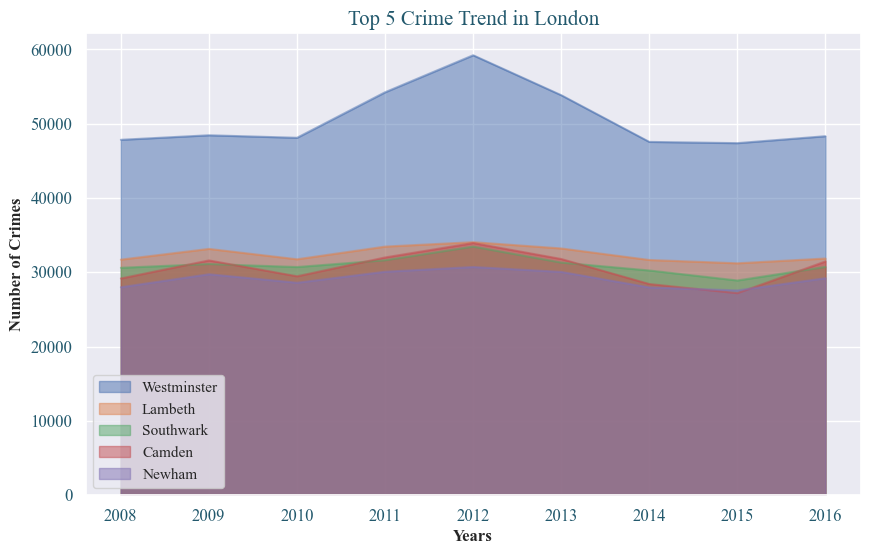

In [11]:
grouped_a11.plot(kind='area', stacked=False, figsize=(10, 6))
plt.title('Top 5 Crime Trend in London', loc='center',size ='15',color='#23596D')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.tick_params(colors='#23596D', which='both')
plt.show()

Area Plot di atas merupakan tren dari 5 kota (Westminster, Lambeth, Southwark, Camden, Newhamdengan) dengan tingkat kejahatan tertinggi dari Januari 2008 hingga Desember 2016. Tingkat kejahatan tertinggi kelima kota dari tren diatas terjadi pada tahun 2012.

# B. Histogram

Bagaimana distribusi major_category terbanyak di London?

In [12]:
grouped_b = df[['major_category','value']].groupby(['major_category']).agg({'value':'sum'}).sort_values(by='value', ascending=False).reset_index()
grouped_b.head(1)

,major_category,value
0,Theft and Handling,2661861


In [13]:
dfb = df[df['major_category']=='Theft and Handling']
dfb.tail()

,borough,major_category,minor_category,value,year,month
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490593,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490596,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,Hillingdon,Theft and Handling,Other Theft,0,2012,2


In [14]:
grouped_b1 = dfb.groupby(['year']).agg({'value':'sum'}).reset_index()
grouped_b1

,year,value
0,2008,283692
1,2009,279492
2,2010,290924
3,2011,309292
4,2012,334054
5,2013,306372
6,2014,279880
7,2015,284022
8,2016,294133


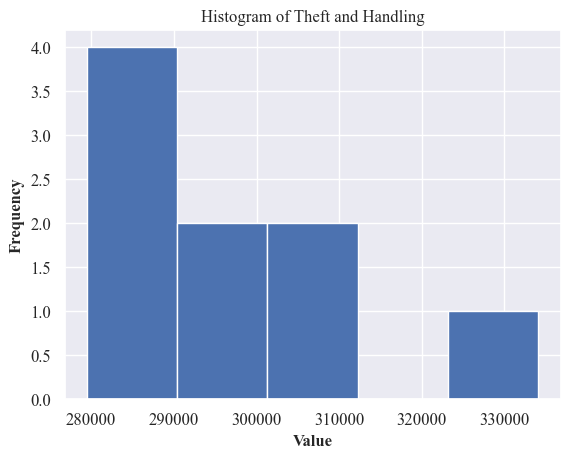

In [15]:
plt.hist(grouped_b1['value'], bins='auto')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Theft and Handling')
plt.grid(True)
plt.show()

In [16]:
grouped_b1.value.skew()

1.3257155544471575

Tingkat kejahatan tertinggi dalam data di atas adalah Theft and Handling. Dari skewness distribusi data kejahatan Theft and Handling bersifat tidak simetris karena skewnessnya tidak berada di rentang -0.5 hingga 0.5. 

# C. Bar Chart

Bagaimana tren dari kejahatan terbanyak yaitu Theft and Handling yang sudah didapatkan di atas pada seluruh wilayah di London dari tahun January 2008 hingga Desember 2016?

In [17]:
grouped_c = grouped_b1

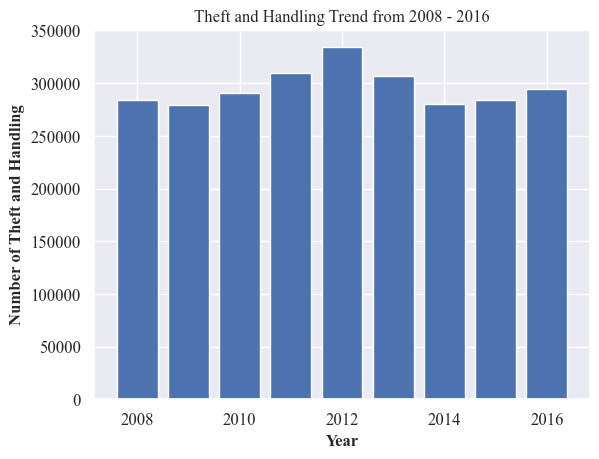

In [18]:
plt.bar(grouped_c['year'], grouped_c['value'])
plt.xlabel('Year')
plt.ylabel('Number of Theft and Handling')
plt.title('Theft and Handling Trend from 2008 - 2016')
plt.grid(True)
plt.show()

Jumlah kriminalitas Trend and Handling fluktuatif, dan jumlah kasus terbanyak terjadi di tahun 2012

# D. Pie Chart

Berapa proporsi setiap major_category dalam data di atas?

In [19]:
grouped_d = grouped_b
grouped_d['percentage'] =grouped_d['value']/sum(grouped_d['value'])*100

In [20]:
grouped_d

,major_category,value,percentage
0,Theft and Handling,2661861,41.283513
1,Violence Against the Person,1558081,24.164694
2,Burglary,754293,11.698531
3,Criminal Damage,630938,9.785386
4,Drugs,470765,7.301220
5,Robbery,258873,4.014930
6,Other Notifiable Offences,106349,1.649395
7,Fraud or Forgery,5325,0.082587
8,Sexual Offences,1273,0.019743


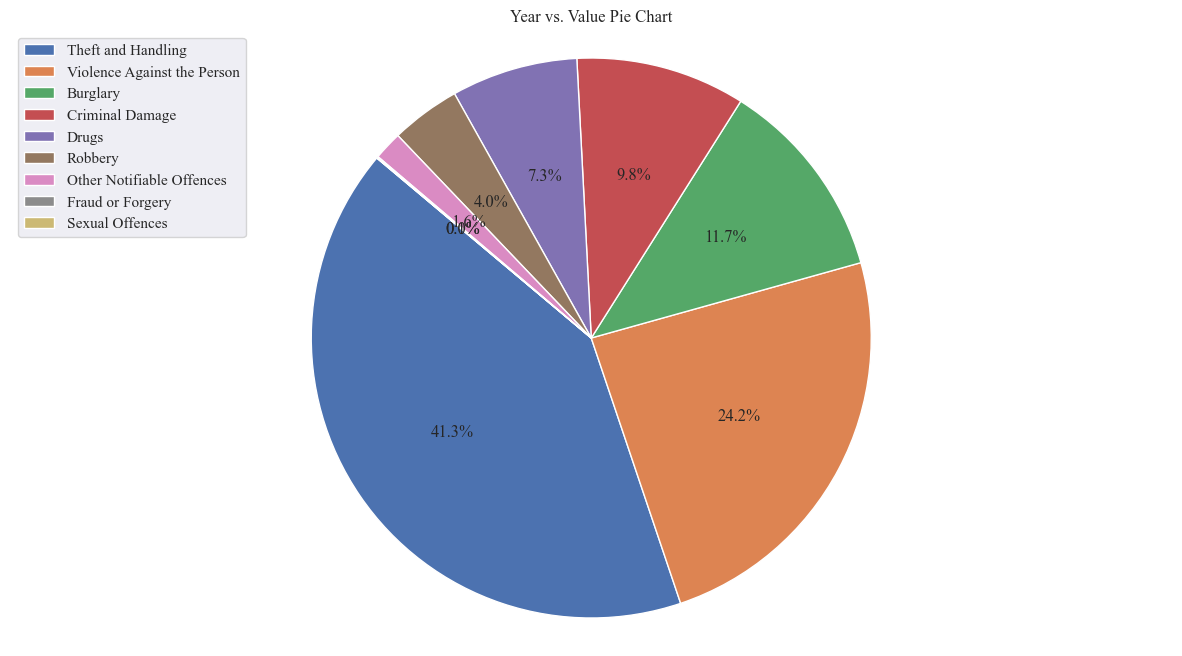

In [21]:
plt.figure(figsize=(15, 8))
plt.pie(grouped_d['value'], labels=None,autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.title('Year vs. Value Pie Chart')
plt.legend(labels=grouped_d.major_category, loc='upper left')
plt.show()


Proporsi major_category terbesar adalah Theft and Handling dengan persentasi sebesar 41.283513%. Sedangkan proporsi major category terkecil adalah Sexual Offfences dengan persentasi sebesar 0.019743%

# E. Box Plot

Bagaimana skewness dari major category terbanyak (Theft and Handling) dan kedua terbanyak (	Violence Against the Person) berdasarkan wilayah dengan tingkat kriminalitas tertinggi?

In [22]:
grouped_e = df.groupby(['borough']).agg({'value':'sum'}).sort_values(by='value', ascending=False).reset_index()
grouped_e.head(1)

,borough,value
0,Westminster,455028


In [23]:
dfe = df[(df['borough']=='Westminster') & (df['major_category']=='Theft and Handling')]
dfe.tail()

,borough,major_category,minor_category,value,year,month
13490016,Westminster,Theft and Handling,Handling Stolen Goods,0,2010,9
13490133,Westminster,Theft and Handling,Other Theft,2,2016,4
13490346,Westminster,Theft and Handling,Theft From Shops,1,2008,9
13490545,Westminster,Theft and Handling,Other Theft,17,2012,6
13490565,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,0,2016,9


In [24]:
grouped_e1 = dfe.groupby(['major_category','year']).agg({'value':'sum'}).reset_index()
grouped_e1

,major_category,year,value
0,Theft and Handling,2008,29266
1,Theft and Handling,2009,29967
2,Theft and Handling,2010,29191
3,Theft and Handling,2011,33529
4,Theft and Handling,2012,38152
5,Theft and Handling,2013,33868
6,Theft and Handling,2014,28144
7,Theft and Handling,2015,27980
8,Theft and Handling,2016,27520


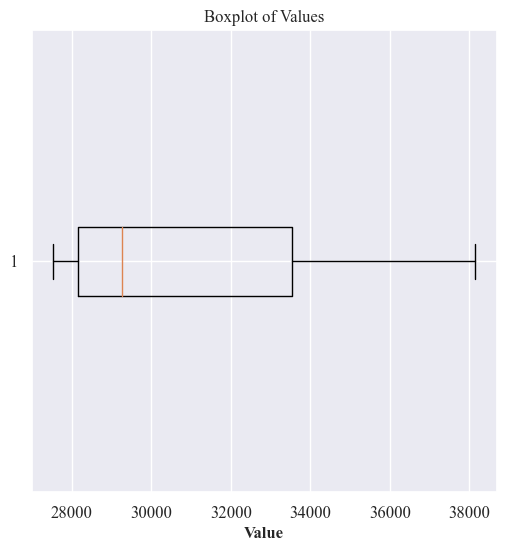

In [25]:
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.boxplot(grouped_e1['value'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('Value')
plt.title('Boxplot of Values')
plt.show()

Dari boxplot diatas dapat dilihat bahwa tidak terdapat outliers dari jumlah kejahatan Theft and Handing di kota Westminster, dan data tersebar secara right skewed.

# F. Scatter Plot

In [26]:
grouped_f = df.groupby(['year','month']).agg({'value':'sum'}).sort_values(by=['year','month']).reset_index()
grouped_f

,year,month,value
0,2008,1,65419
1,2008,2,62626
2,2008,3,61343
3,2008,4,59640
4,2008,5,62587
...,...,...,...
103,2016,8,62666
104,2016,9,61412
105,2016,10,63405
106,2016,11,61064


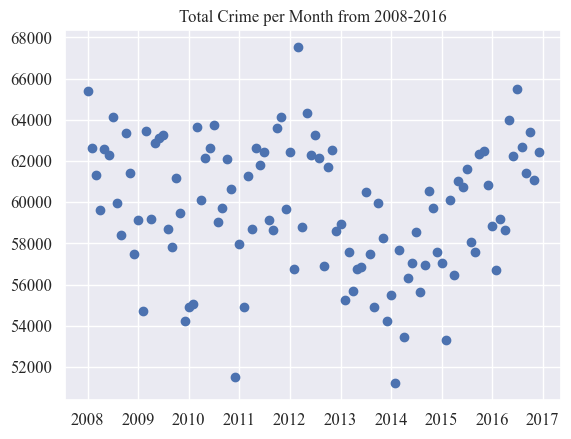

In [27]:
grouped_f['date'] = pd.to_datetime(grouped_f.year.map(str) + '-' + grouped_f.month.map(str), format = '%Y-%m')
plt.scatter(x=grouped_f['date'], y=grouped_f['value'])
plt.title('Total Crime per Month from 2008-2016')
plt.show()

Tingkat kriminalitas di London dari tahun ke tahun cenderung fluktuatif, namun dapat terlihat dalam plot diatas bahwa tingkat kriminalitas meningkat pada tahun 2012

# G. Word Clouds

Minor category apakah yang terbanyak di London?

In [28]:
from wordcloud import WordCloud, STOPWORDS

In [29]:
stopwords = set(STOPWORDS)

In [30]:
wc = WordCloud(background_color = 'white',stopwords=stopwords).generate(str(df.minor_category.values))

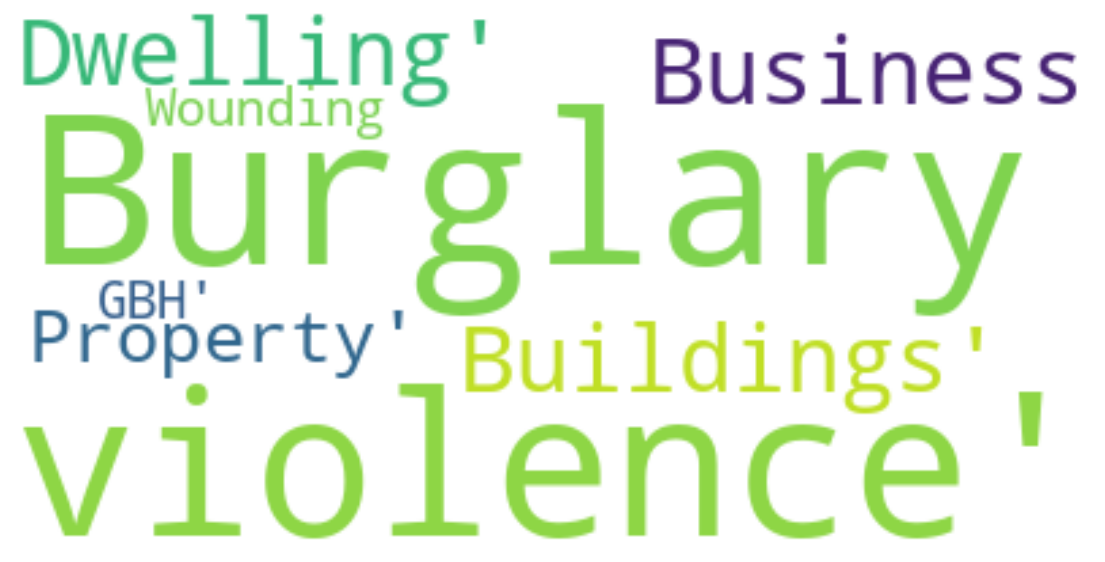

In [31]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wc, interpolation ='bilinear')
plt.axis('off')
plt.show()

Dari word cloud di atas, minor_category dengan jumlah terbanyak adalah Burglary dan kedua terbanyak adalah violence

# Kesimpulan

Tingkat kriminalitas tertinggi di London secara keseluruhan meningkat pada tahun 2012 dan kejahatan tertingginya adalah Theft and Handling, diikuti oleh Violence Against the Person. Dari seluruh borough di London, borough yang paling banyak tingkat kriminalitasnya adalah Westminister.